In [49]:
from os import listdir
from matplotlib import image
import random
import numpy as np 
from dataclasses import dataclass

# load images in a directory 
random.seed(8)
random_indexes = random.sample(range(25000), 250)
loaded_images = list()
for i in range(250):
	# load image
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('E:/Labs/mirflickr/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im7797.jpg (333, 500, 3)
> loaded im19419.jpg (470, 500, 3)
> loaded im17833.jpg (332, 500, 3)
> loaded im4273.jpg (375, 500, 3)
> loaded im12122.jpg (327, 500, 3)
> loaded im19789.jpg (500, 433, 3)
> loaded im15533.jpg (500, 375, 3)
> loaded im20503.jpg (500, 333, 3)
> loaded im19033.jpg (344, 500, 3)
> loaded im2147.jpg (334, 500, 3)
> loaded im19844.jpg (333, 500, 3)
> loaded im431.jpg (375, 500, 3)
> loaded im15375.jpg (333, 500, 3)
> loaded im8498.jpg (335, 500, 3)
> loaded im18048.jpg (333, 500, 3)
> loaded im7678.jpg (500, 336, 3)
> loaded im6283.jpg (321, 480, 3)
> loaded im23499.jpg (375, 500, 3)
> loaded im15409.jpg (335, 500, 3)
> loaded im17726.jpg (333, 500, 3)
> loaded im18010.jpg (500, 333, 3)
> loaded im15609.jpg (333, 500, 3)
> loaded im13013.jpg (498, 500, 3)
> loaded im20940.jpg (375, 500, 3)
> loaded im4935.jpg (337, 500, 3)
> loaded im7599.jpg (500, 333, 3)
> loaded im20803.jpg (375, 500, 3)
> loaded im4968.jpg (333, 500, 3)
> loaded im17143.jpg (500, 375,

In [50]:
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i images' % (index))

> processed 10 images
> processed 20 images
> processed 30 images
> processed 40 images
> processed 50 images
> processed 60 images
> processed 70 images
> processed 80 images
> processed 90 images
> processed 100 images
> processed 110 images
> processed 120 images
> processed 130 images
> processed 140 images
> processed 150 images
> processed 160 images
> processed 170 images
> processed 180 images
> processed 190 images
> processed 200 images
> processed 210 images
> processed 220 images
> processed 230 images
> processed 240 images
> processed 250 images


In [51]:
RED = 0
GREEN = 1
BLUE = 2
# Expected value & Variance
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_blue, D_blue))

Red: Expected value - 113.48, Variance - 6126.48
Green: Expected value - 104.92, Variance - 5634.68
Blue: Expected value - 97.43, Variance - 6118.77


In [52]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans
        
#Asymmetry and excess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Excess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2)
Excess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2)
Excess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2)
print('Red: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_red, Excess_red))
print('Green: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_green, Excess_green))
print('Blue: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_blue, Excess_blue))

Red: Asymmetry - 0.162, Excess - 1.811
Green: Asymmetry - 0.299, Excess - 1.959
Blue: Asymmetry - 0.426, Excess - 1.942


In [53]:
#3. Gethering info vectors
Vector_A = np.array([np.array([M_red, D_red, Asym_red, Excess_red]),
                     np.array([M_green, D_green, Asym_green, Excess_green]),
                     np.array([M_blue, D_blue, Asym_blue, Excess_blue])])
print("Vector_A:\n" + str(Vector_A))
Vector_All_DATA = np.copy(Vector_A)
itear = 0
for image in loaded_images:
    image = np.reshape(image, (-1, 3))
    image = np.swapaxes(image, 0, 1)
    Vector_All_DATA = np.concatenate((Vector_All_DATA,image),axis=1)
    itear += 1
    if (itear % 10 == 0):
        print(str(itear) + " img")

Vector_A:
[[1.13479336e+02 6.12647805e+03 1.61803881e-01 1.81072875e+00]
 [1.04923001e+02 5.63468056e+03 2.98685452e-01 1.95934798e+00]
 [9.74325979e+01 6.11877257e+03 4.25669692e-01 1.94242659e+00]]
10 img
20 img
30 img
40 img
50 img
60 img
70 img
80 img
90 img
100 img
110 img
120 img
130 img
140 img
150 img
160 img
170 img
180 img
190 img
200 img
210 img
220 img
230 img
240 img
250 img


In [54]:
#4. Gaussian models

#a Expected value
P_x1 = np.random.normal(M_red, D_red, 1)
print("Expected value + colors:\n" + str(P_x1))

#b Expected value and dispersion
P_x2 = np.cov(Vector_All_DATA)
print("Expected value + dispersion + colors:\n" + str(P_x2[:2, :2]))

#c Expected value, dispersion and asymetry
print("Expected value + dispersion + asymetry + colors:\n" + str(P_x2[:3, :3]))

#d Expected value, dispersion, asymetry and excess
print("Expected value + dispersion + asymetry + excess + colors:\n" + str(P_x2[:4, :4]))

Expected value + colors:
[-4665.36960346]
Expected value + dispersion + colors:
[[6127.27295305 5160.31674988]
 [5160.31674988 5635.35280141]]
Expected value + dispersion + asymetry + colors:
[[6127.27295305 5160.31674988 4496.88611699]
 [5160.31674988 5635.35280141 5366.92147338]
 [4496.88611699 5366.92147338 6119.56953015]]
Expected value + dispersion + asymetry + excess + colors:
[[6127.27295305 5160.31674988 4496.88611699]
 [5160.31674988 5635.35280141 5366.92147338]
 [4496.88611699 5366.92147338 6119.56953015]]


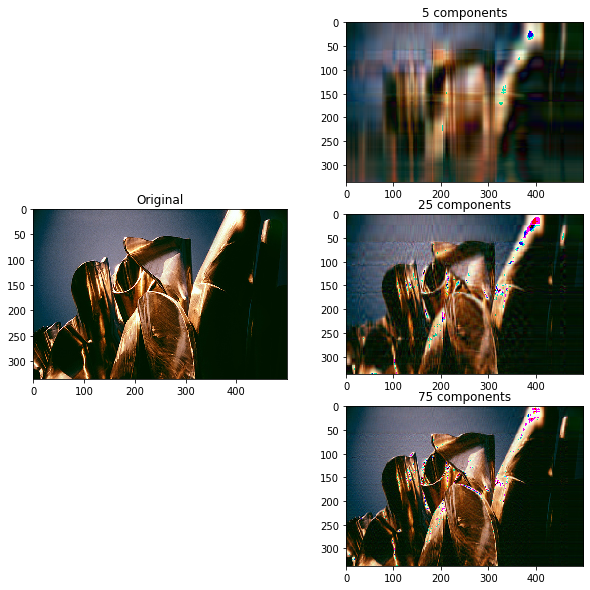

In [55]:
#5. a.Restoring using PCA
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

test_img = loaded_images[68]
a_np = np.array(test_img)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def PCA_2d(image_2d, numpc):
	cov_mat = image_2d - np.mean(image_2d)
	eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))
	p = np.size(eig_vec, axis =1)
	idx = np.argsort(eig_val)
	idx = idx[::-1]
	eig_vec = eig_vec[:,idx]
	eig_val = eig_val[idx]
    
	if numpc <p or numpc >0:
		eig_vec = eig_vec[:, range(numpc)]
	score = np.dot(eig_vec.T, cov_mat)
	recon = np.dot(eig_vec, score) + np.mean(image_2d).T
	recon_img_mat = np.uint8(np.absolute(recon))
	return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 5), PCA_2d(a_g, 5), PCA_2d(a_b, 5)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title('Original')
plt.imshow(loaded_images[68])
fig.add_subplot(3, 2, 2)
plt.title('5 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 25), PCA_2d(a_g, 25), PCA_2d(a_b, 25)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 4)
plt.title('25 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 75), PCA_2d(a_g, 75), PCA_2d(a_b, 75)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 6)
plt.title('75 components')
plt.imshow(recon_color_img)
plt.show()
# recon_color_img = Image.fromarray(recon_color_img)
# recon_color_img.show()

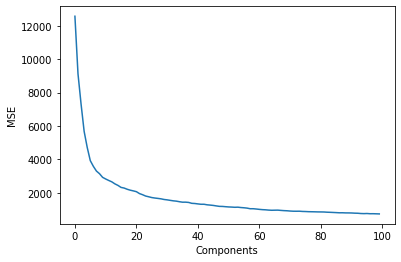

In [56]:
# b.calculating MSE
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

mse_list = list()
for i in range(100):
    a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, i), PCA_2d(a_g, i), PCA_2d(a_b, i)
    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
    mse_list.append(mse(test_img, recon_color_img))
plt.plot(range(len(mse_list)),mse_list)
plt.xlabel("Components")
plt.ylabel("MSE")
plt.show()

In [57]:
#6 Markov chain:

markov_matrix1 = np.zeros(shape=(256, 256))
#c-type
arr = a_r.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 1st oder:\n", markov_matrix)
print("\nRed matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix1 = np.zeros(shape=(256, 256))
#Fortran-type
arr = a_r.flatten('F')
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 2-nd type 1st oder:\n", markov_matrix)
print("\nRed matrix 2-nd type 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix2 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix2[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix2[0] / sum(markov_matrix2[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix2[i] / sum(markov_matrix2[i])))
print("\n\nGreen matrix 1st oder:\n", markov_matrix)
print("\nGreen matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix3 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix3[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix3[0] / sum(markov_matrix3[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix3[i] / sum(markov_matrix3[i])))
print("\n\nBlue matrix 1st oder:\n", markov_matrix)
print("\nBlue matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

Red matrix 1st oder:
 [[7.64197119e-01 1.19055565e-01 4.09644585e-02 ... 0.00000000e+00
  0.00000000e+00 2.78102230e-05]
 [2.13454198e-01 6.42795802e-01 7.91507634e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.00667881e-01 2.70188221e-01 2.94626594e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.23741007e-02
  2.87769784e-02 7.55395683e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.42214533e-02
  1.73010381e-02 2.76816609e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.93236715e-02
  2.17391304e-02 5.31400966e-02]]

Red matrix 2nd order:
 [[6.29050053e-01 1.85802339e-01 6.07096130e-02 ... 1.45982868e-05
  2.05760152e-05 8.31629664e-05]
 [3.27326388e-01 4.67400071e-01 9.11941054e-02 ... 4.56741181e-06
  4.45261287e-06 2.62930678e-05]
 [3.11696739e-01 3.05131820e-01 1.47705402e-01 ... 6.40654166e-06
  1.27960651e-05 4.58986323e-05]
 ...
 [7.79013329e-04 1.29662043e-04 2.37982554e-04 ... 1

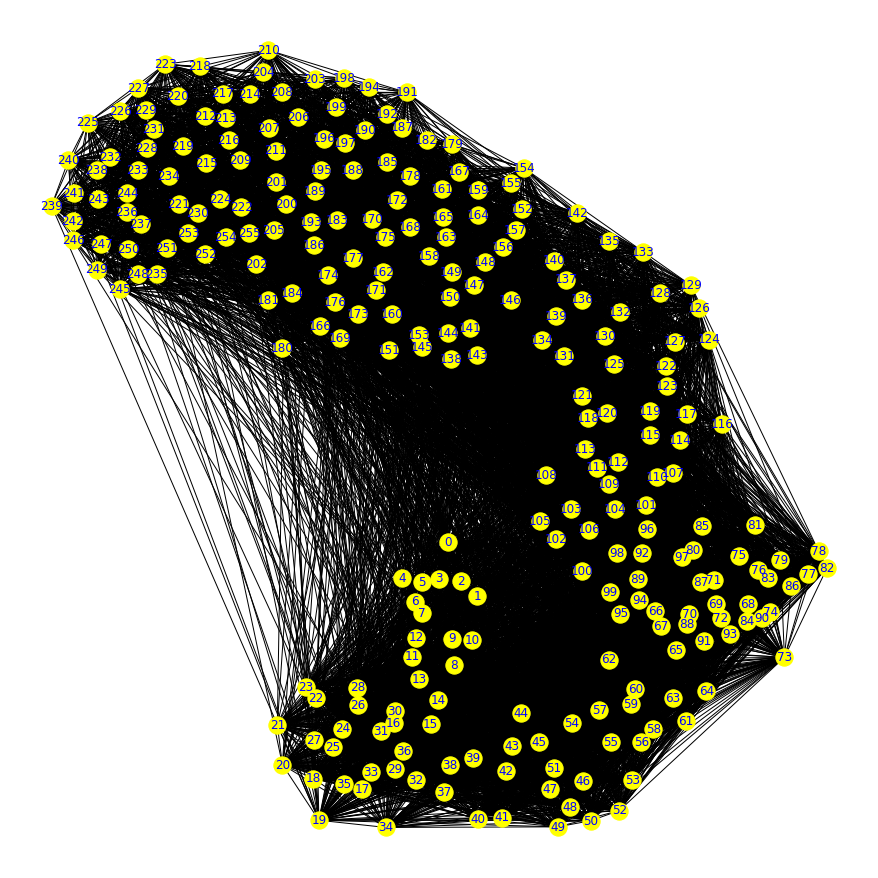

In [58]:
#Graph
import networkx as nx
import pandas as pd

data = markov_matrix
data = np.triu(data) + np.triu(data).T
ind = [str(i) for i in range(data.shape[0])]
df2 = pd.DataFrame(data, index=ind, columns=ind)
plt.figure(1,figsize=(12,12))  
G2 = nx.from_pandas_adjacency(df2)

nx.draw(G2, with_labels=True, node_color='yellow', font_color='blue')
plt.show()

In [59]:
test = pd.DataFrame(markov_matrix)
test

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.011628,0.005814,0.017442,0.011628,0.005814,0.005814,0.034884,0.017442,0.005814,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.025000,0.012500,0.025000,0.012500,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.014286,0.042857,0.014286,0.014286,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.019231,0.038462,0.000000,0.000000,0.038462,0.000000,0.019231,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.037037,0.037037,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.018519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014706,0.019608,0.019608,0.014706,0.049020,0.068627,0.058824,0.029412,0.093137,0.215686
252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010753,0.017921,0.035842,0.053763,0.025090,0.053763,0.096774,0.064516,0.100358,0.197133
253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007557,0.012594,0.007557,0.010076,0.037783,0.035264,0.065491,0.138539,0.153652,0.241814
254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007952,0.007952,0.021869,0.013917,0.023857,0.021869,0.055666,0.145129,0.210736,0.266402


In [60]:
import quantecon as qe
def regularity_check(matrix):
    counter = 0
    for a in range(1,6):
        matrix = np.linalg.matrix_power(matrix,a)

        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                if matrix[i,j] < 0:
                    counter += 1 
        print('iteration: ' , a, 'negative elements: ' ,counter)
        
regularity_check(markov_matrix)
print('Для 5 ітерації ,виконується умова регулярності.Модель регулярна ')

P = markov_matrix
mc = qe.MarkovChain(P, [str(i) for i in range(0,256)])
print('Модель незворотня -  ', mc.is_irreducible)
print('Рекурентну називають модель M  яка з ймовірністю в P = 1 при покиданні стану вернеться в цей стан за час t < inf,у майбутньму')
print("Кількість рекурентних станів " ,np.shape(mc.recurrent_classes)[1])
if np.shape(mc.recurrent_classes_indices)[1] == 256:
    print('Усі стани моделі рекурентні, модель рекурентна ')
else :
    print('Модель не рекурентна' )

iteration:  1 negative elements:  0
iteration:  2 negative elements:  0
iteration:  3 negative elements:  0
iteration:  4 negative elements:  0
iteration:  5 negative elements:  0
Для 5 ітерації ,виконується умова регулярності.Модель регулярна 
Модель незворотня -   True
Рекурентную називають модель M  яка з ймовірністю в P = 1 при покиданні стану вернеться в цей стан за час t < inf,у майбутньму
Кількість рекурентних станів  256
Усі стани моделі рекурентні ,модель рекурентна 
